<a href="https://colab.research.google.com/github/Dhaneshkp/GraphML/blob/main/Fraudulent%20transactions-Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade certifi

!pip install --trusted-host files.pythonhosted.org optuna



In [7]:
os.listdir()

['.config', 'fraudTrain.csv', 'sample_data']

In [8]:
data=pd.read_csv("fraudTrain.csv")

In [9]:

def are_cc_numbers_unique(df, cc_column):

    try:
      # Check if the specified column exists in the DataFrame.
      if cc_column not in df.columns:
          print(f"Error: Column '{cc_column}' not found in the DataFrame.")
          return False

      return df[cc_column].nunique() == len(df)

    except Exception as e:
      print(f"An error occurred: {e}")
      return False


are_unique = are_cc_numbers_unique(data, 'cc_num')

if are_unique:
     print("All credit card numbers are unique.")
else:
     print("Some credit card numbers are duplicated.")

Some credit card numbers are duplicated.


In [10]:

import datetime

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Extract the time of day as an integer representing minutes since midnight
data['time_of_day'] = (data['trans_date_trans_time'].dt.hour * 60) + data['trans_date_trans_time'].dt.minute


data['time_of_day_category'] = pd.cut(data['time_of_day'], bins=[0, 6*60, 12*60, 18*60, 24*60],
                                      labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)


data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time_of_day,time_of_day_category
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,Night
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,Night
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,Night
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,1,Night
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,3,Night


In [11]:

data['unix_time_c'] = pd.to_datetime(data['unix_time'], unit='s')

# Extract the time of day as an integer representing minutes since midnight
data['time_of_day_uc'] = (data['unix_time_c'].dt.hour * 60) + data['unix_time_c'].dt.minute

data['time_of_day_category_uc'] = pd.cut(data['time_of_day_uc'], bins=[0, 6*60, 12*60, 18*60, 24*60],
                                      labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,time_of_day,time_of_day_category,unix_time_c,time_of_day_uc,time_of_day_category_uc
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,0,Night,2012-01-01 00:00:18,0.0,Night
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,0,Night,2012-01-01 00:00:44,0.0,Night
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,0,Night,2012-01-01 00:00:51,0.0,Night
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,1,Night,2012-01-01 00:01:16,1.0,Night
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,3,Night,2012-01-01 00:03:06,3.0,Night


In [12]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'time_of_day',
       'time_of_day_category', 'unix_time_c', 'time_of_day_uc',
       'time_of_day_category_uc'],
      dtype='object')

In [13]:
data.describe()

,Unnamed: 0,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,time_of_day,unix_time_c,time_of_day_uc
count,27259.00000,27259,2.725900e+04,27259.000000,27258.000000,27258.000000,27258.000000,2.725800e+04,2.725800e+04,27258.000000,27258.000000,27258.000000,27259.000000,27258,27258.000000
mean,13629.00000,2019-01-09 02:02:32.238490368,4.203488e+17,71.834406,48732.303581,38.525900,-90.224295,9.005962e+04,1.326075e+09,38.525442,-90.225811,0.009355,794.846326,2012-01-09 02:02:08.177782784,794.839790
min,0.00000,2019-01-01 00:00:18,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.040141,-166.629875,0.000000,0.000000,2012-01-01 00:00:18,0.000000
25%,6814.50000,2019-01-05 12:19:22.500000,1.800462e+14,9.680000,25526.000000,34.690200,-96.809400,7.540000e+02,1.325766e+09,34.785420,-96.950790,0.000000,453.000000,2012-01-05 12:19:16.249999872,453.000000
50%,13629.00000,2019-01-08 17:24:49,3.519233e+15,47.890000,48088.000000,39.339100,-87.476900,2.501000e+03,1.326043e+09,39.334418,-87.430602,0.000000,847.000000,2012-01-08 17:24:14,847.000000
75%,20443.50000,2019-01-13 11:06:06,4.651007e+15,83.600000,72042.000000,41.846700,-80.124800,2.112500e+04,1.326453e+09,41.899086,-80.148617,0.000000,1142.000000,2012-01-13 11:05:46.249999872,1142.000000
max,27258.00000,2019-01-16 16:13:19,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326730e+09,66.659242,-66.967742,1.000000,1439.000000,2012-01-16 16:12:26,1439.000000
std,7869.13983,NaN,1.313623e+18,151.848187,26978.693903,5.097014,13.927149,2.988129e+05,3.959763e+05,5.124933,13.946210,0.096270,408.755908,NaN,408.761981


In [14]:
data.describe(include='object')

,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,27259,27259,27259,27259,27259,27259,27258,27258,27258,27258,27258
unique,693,14,337,465,2,910,836,50,475,895,27258
top,fraud_Cormier LLC,gas_transport,Christopher,Smith,F,72269 Elizabeth Field Apt. 132,Phoenix,TX,Exhibition designer,1977-03-23,8c7acaafddc3b450418ecaa467f30cc5
freq,87,2741,594,574,14837,92,125,1971,199,112,1


In [15]:
train_df = data.drop(['Unnamed: 0', 'trans_date_trans_time','trans_num', 'unix_time'],axis=1)
#test_df = pd.read_csv('fraudTest.csv')

In [16]:
train_df=train_df.sample(frac=0.5,random_state=1)# if the data us indded by a person or a cc num then this sampling isnt appropriate

In [17]:
train_df['distance']= (train_df['lat'] - train_df['merch_lat'])**2 + (train_df['long'] - train_df['merch_long'])**2

In [18]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english') and not word.isdigit()])
    return text

# Apply cleaning to relevant columns
train_df['merchant'] = train_df['merchant'].apply(clean_text)
train_df['category'] = train_df['category'].apply(clean_text)
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
train_df['city_state'] = train_df['city'] + '_' + train_df['state']

In [20]:
train_df = train_df.dropna(subset=['dob'])

In [21]:
from datetime import datetime

# Function to calculate age
def calculate_age(dob):
    dob = str(dob)
    today = datetime.today()
    dob = datetime.strptime(dob, '%Y-%m-%d')
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age

# Apply the function to the 'dob' column
train_df['age'] = train_df['dob'].apply(calculate_age)


In [22]:
categorical_columns = ['category', 'gender', 'job','city','state','merchant','street','city_state']
for column in categorical_columns:
    train_df[column] = train_df[column].astype('category')

In [23]:
train_df.dtypes

,0
cc_num,int64
merchant,category
category,category
amt,float64
first,object
last,object
gender,category
street,category
city,category
state,category


In [24]:
train_df.drop(['merch_lat', 'merch_long','lat', 'long'],axis=1,inplace=True)

In [25]:
train_df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'is_fraud',
       'time_of_day', 'time_of_day_category', 'unix_time_c', 'time_of_day_uc',
       'time_of_day_category_uc', 'distance', 'city_state', 'age'],
      dtype='object')

In [26]:
train_df.drop(['street','zip','city_pop'],axis=1,inplace=True)

In [27]:
train_df.drop(['dob'],axis=1,inplace=True)

In [28]:
train_df.to_csv("train_df_new.csv")

In [29]:
train_df=pd.read_csv("train_df_new.csv")
train_df.drop('Unnamed: 0',axis=1,inplace=True)

In [30]:
!pip install pykeen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.4/718.4 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.9 MB/s eta 0:00:00


In [31]:
import networkx as nx

G = nx.Graph()

# Add nodes and edges based on the data
for index, row in train_df.iterrows():
    trans_id = f'trans_{index}'
    G.add_node(trans_id, label='transaction')
    G.add_node(row['merchant'], label='merchant')
    G.add_node(row['category'], label='category')
    G.add_node(row['city'], label='city')
    G.add_node(row['state'], label='state')
    G.add_edge(trans_id, row['merchant'], relationship='made_at')
    G.add_edge(trans_id, row['category'], relationship='belongs_to')
    G.add_edge(trans_id, row['city'], relationship='located_in')
    G.add_edge(trans_id, row['state'], relationship='in')
    G.add_node(row['cc_num'], label='cc_num')
    G.add_edge(trans_id, row['cc_num'], relationship='card')
    #G.add_node(row['job'], label='job')
    #G.add_edge(trans_id, row['job'], relationship='job')

In [32]:
from pykeen.pipeline import pipeline
from pykeen.triples import TriplesFactory
from sklearn.model_selection import train_test_split
import torch
# Create triples for KG (subject, predicate, object)
triples = []
for index, row in train_df.iterrows():
    trans_id = f'trans_{index}'
    triples.append((trans_id, 'made_at', row['merchant']))
    triples.append((trans_id, 'belongs_to', row['category']))
    triples.append((trans_id, 'located_in', row['city']))
    triples.append((trans_id, 'in', row['state']))
    #triples.append((trans_id, 'job', row['job']))
    triples.append((trans_id, 'card', row['cc_num']))
triples = np.array(triples)
# Create a PyKEEN dataset
for i in range(25):
    print(triples[i])

# Check data types of the triples
print(type(triples[0][0]), type(triples[0][1]), type(triples[0][2]))

# Remove malformed entries
valid_triples = [triple for triple in triples if len(triple) == 3]
triples = np.array(valid_triples)

# Split the triples into training and testing sets
train_triples, test_triples = train_test_split(triples, test_size=0.2, random_state=42)
train_triples=triples
# Create TriplesFactory objects for training and testing sets
train_tf = TriplesFactory.from_labeled_triples(train_triples)
test_tf = TriplesFactory.from_labeled_triples(test_triples)

# Print TriplesFactory details for debugging
print(train_tf)
print(test_tf)

# Train a KG embedding model with both training and testing triples factories
result = pipeline(
    training=train_tf,
    testing=test_tf,
    model='TransE',
    training_kwargs=dict(num_epochs=10),
)
all_entities = train_tf.entity_to_id
embeddings = result.model.entity_representations[0](indices=torch.arange(train_tf.num_entities, device=result.model.device)).cpu().detach().numpy()

# Create a DataFrame with embeddings
embedding_df = pd.DataFrame(embeddings, index=all_entities.keys())

# Merge embeddings with labels
train_df['embedding'] = train_df.index.map(lambda x: embedding_df.loc[f'trans_{x}'].values)

INFO:pykeen.utils:Using opt_einsum


['trans_0' 'made_at' 'fraud_rutherfordmertz']
['trans_0' 'belongs_to' 'grocery_pos']
['trans_0' 'located_in' 'Armonk']
['trans_0' 'in' 'NY']
['trans_0' 'card' '675909898057']
['trans_1' 'made_at' 'fraud_brown inc']
['trans_1' 'belongs_to' 'kids_pets']
['trans_1' 'located_in' 'Phoenix']
['trans_1' 'in' 'AZ']
['trans_1' 'card' '3576431665303017']
['trans_2' 'made_at' 'fraud_jast ltd']
['trans_2' 'belongs_to' 'shopping_net']
['trans_2' 'located_in' 'Winfield']
['trans_2' 'in' 'WV']
['trans_2' 'card' '30235438713303']
['trans_3' 'made_at' 'fraud_daugherty pouros beahan']
['trans_3' 'belongs_to' 'shopping_pos']
['trans_3' 'located_in' 'Cuyahoga Falls']
['trans_3' 'in' 'OH']
['trans_3' 'card' '5501083170975659']
['trans_4' 'made_at' 'fraud_bernier sons']
['trans_4' 'belongs_to' 'kids_pets']
['trans_4' 'located_in' 'Clarks Mills']
['trans_4' 'in' 'PA']
['trans_4' 'card' '6538441737335434']
<class 'numpy.str_'> <class 'numpy.str_'> <class 'numpy.str_'>


INFO:pykeen.pipeline.api:Using device: None


TriplesFactory(num_entities=16128, num_relations=5, create_inverse_triples=False, num_triples=68150)
TriplesFactory(num_entities=11439, num_relations=5, create_inverse_triples=False, num_triples=13630)


Training epochs on cuda:0:   0%|          | 0/10 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/267 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/13.6k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 2.99s seconds


In [33]:
!pip install python-louvain

from community import community_louvain

# Calculate the Louvain community structure
partition = community_louvain.best_partition(G)

# Add the community assignments to the dataframe
train_df['community'] = train_df.index.map(lambda x: partition.get(f'trans_{x}', -1))

# Print or further analyze the community assignments
print(train_df[['community']])

       community
0             24
1              5
2             35
3              8
4              2
...          ...
13625          1
13626         25
13627          0
13628         17
13629         43

[13630 rows x 1 columns]


In [50]:
train_df.describe()

,cc_num,amt,is_fraud,time_of_day,time_of_day_uc,distance,age,community,predicted_labels,gender_encoded
count,1.363000e+04,13630.000000,13630.000000,13630.000000,13630.000000,13630.000000,13630.000000,13630.000000,13630.0,13630.000000
mean,4.161259e+17,72.655296,0.009685,795.069773,795.069773,0.670943,50.924358,19.244607,0.0,0.454806
std,1.308740e+18,136.561775,0.097936,408.257040,408.257040,0.420904,17.422948,12.937186,0.0,0.497972
min,6.041621e+10,1.000000,0.000000,0.000000,0.000000,0.000013,19.000000,0.000000,0.0,0.000000
25%,1.800466e+14,9.572500,0.000000,453.000000,453.000000,0.323529,37.000000,7.000000,0.0,0.000000
50%,3.520550e+15,47.940000,0.000000,846.500000,846.500000,0.638738,49.000000,20.000000,0.0,0.000000
75%,4.653879e+15,84.300000,0.000000,1143.000000,1143.000000,0.957840,62.000000,31.000000,0.0,1.000000
max,4.992346e+18,6337.250000,1.000000,1439.000000,1439.000000,1.997575,100.000000,43.000000,0.0,1.000000


In [48]:
from sklearn.semi_supervised import LabelPropagation

# Ensure labels and graph_laplacian have the same dimension
labels = train_df['is_fraud'].values
# Get the indices of the nodes corresponding to transactions
transaction_nodes = [node for node in G.nodes() if str(node).startswith('trans_')]
# Subset the graph_laplacian to include only transaction nodes
graph_laplacian = nx.laplacian_matrix(G, nodelist=transaction_nodes).toarray()

label_prop_model = LabelPropagation()

# Fit the model with the adjusted graph_laplacian and labels
label_prop_model.fit(graph_laplacian, labels)

# Predict labels for transaction nodes
predicted_labels = label_prop_model.predict(graph_laplacian)

# Add the predicted labels to the dataframe
train_df['predicted_labels'] = predicted_labels

print(train_df[['community', 'predicted_labels']])

       community  predicted_labels
0             24               0.0
1              5               0.0
2             35               0.0
3              8               0.0
4              2               0.0
...          ...               ...
13625          1               0.0
13626         25               0.0
13627          0               0.0
13628         17               0.0
13629         43               0.0

[13630 rows x 2 columns]


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   cc_num                   13630 non-null  int64   
 1   merchant                 13630 non-null  category
 2   category                 13630 non-null  category
 3   amt                      13630 non-null  float64 
 4   first                    13630 non-null  category
 5   last                     13630 non-null  category
 6   gender                   13630 non-null  category
 7   city                     13630 non-null  category
 8   state                    13630 non-null  category
 9   job                      13630 non-null  category
 10  is_fraud                 13630 non-null  float64 
 11  time_of_day              13630 non-null  int64   
 12  time_of_day_category     13630 non-null  category
 13  unix_time_c              13630 non-null  category
 14  time_o

In [37]:
train_df.dropna()

,cc_num,merchant,category,amt,first,last,gender,city,state,job,...,time_of_day_category,unix_time_c,time_of_day_uc,time_of_day_category_uc,distance,city_state,age,embedding,community,predicted_labels
0,675909898057,fraud_rutherfordmertz,grocery_pos,75.86,Christopher,Henry,M,Armonk,NY,Television/film/video producer,...,Night,2012-01-11 05:28:30,328.0,Night,0.263486,Armonk_NY,60,"[0.10855632, -0.006414317, 0.026946088, -0.038...",24,0.0
1,3576431665303017,fraud_brown inc,kids_pets,83.63,Jessica,Ward,F,Phoenix,AZ,Contractor,...,Afternoon,2012-01-11 13:28:17,808.0,Afternoon,0.371717,Phoenix_AZ,43,"[-0.09085007, 0.22448042, 0.18029752, -0.11059...",5,0.0
2,30235438713303,fraud_jast ltd,shopping_net,7.30,James,Baldwin,M,Winfield,WV,Exhibition designer,...,Evening,2012-01-08 22:42:44,1362.0,Evening,0.286352,Winfield_WV,44,"[-0.21899045, 0.016744006, 0.18644768, -0.1128...",35,0.0
3,5501083170975659,fraud_daugherty pouros beahan,shopping_pos,9.75,Wayne,Payne,M,Cuyahoga Falls,OH,Equities trader,...,Night,2012-01-04 03:06:47,186.0,Night,1.064038,Cuyahoga Falls_OH,58,"[0.047657166, 0.03474391, 0.086119086, -0.2917...",8,0.0
4,6538441737335434,fraud_bernier sons,kids_pets,51.71,Gina,Grimes,F,Clarks Mills,PA,Energy manager,...,Evening,2012-01-07 19:23:41,1163.0,Evening,0.960010,Clarks Mills_PA,27,"[0.08795907, 0.01684853, -0.1791497, -0.096553...",2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13625,3535808924394848,fraud_gottlieb considine schultz,shopping_net,84.61,Matthew,Myers,M,Tower Hill,IL,Radio broadcast assistant,...,Morning,2012-01-02 06:58:53,418.0,Morning,1.117828,Tower Hill_IL,44,"[-0.041168924, 0.114706285, 0.018693268, -0.10...",1,0.0
13626,343668971234893,fraud_cartwright plc,kids_pets,68.75,Sally,Moore,F,Hopkins,SC,Chiropodist,...,Afternoon,2012-01-15 16:42:01,1002.0,Afternoon,0.443169,Hopkins_SC,75,"[0.17117961, 0.1370543, -0.050124276, 0.110741...",25,0.0
13627,30044330818990,fraud_littlegleichner,travel,3.58,Allison,Ayala,F,Fort Myers,FL,Paramedic,...,Evening,2012-01-01 19:24:38,1164.0,Evening,0.639074,Fort Myers_FL,39,"[-0.22329666, 0.13719562, -0.09641198, 0.00555...",0,0.0
13628,2383461948823908,fraud_grimes llc,entertainment,71.79,Patrick,Vaughan,M,Parsonsfield,ME,Audiological scientist,...,Afternoon,2012-01-08 15:30:10,930.0,Afternoon,0.836009,Parsonsfield_ME,68,"[-0.15471232, 0.14345825, 0.20632915, 0.184713...",17,0.0


In [38]:
for col in train_df.columns:
    if train_df[col].dtype == 'object' and col != 'embedding':  # Skip 'embedding' column
        train_df[col] = train_df[col].astype('category')

In [59]:
train_df=train_df.dropna()

In [68]:
train_df

,cc_num,merchant,category,amt,first,last,gender,city,state,job,...,unix_time_c,time_of_day_uc,time_of_day_category_uc,distance,city_state,age,embedding,community,predicted_labels,gender_encoded
0,675909898057,fraud_rutherfordmertz,grocery_pos,75.86,Christopher,Henry,M,Armonk,NY,Television/film/video producer,...,2012-01-11 05:28:30,328.0,Night,0.263486,Armonk_NY,60,"[0.10855632, -0.006414317, 0.026946088, -0.038...",24,0.0,1
1,3576431665303017,fraud_brown inc,kids_pets,83.63,Jessica,Ward,F,Phoenix,AZ,Contractor,...,2012-01-11 13:28:17,808.0,Afternoon,0.371717,Phoenix_AZ,43,"[-0.09085007, 0.22448042, 0.18029752, -0.11059...",5,0.0,0
2,30235438713303,fraud_jast ltd,shopping_net,7.30,James,Baldwin,M,Winfield,WV,Exhibition designer,...,2012-01-08 22:42:44,1362.0,Evening,0.286352,Winfield_WV,44,"[-0.21899045, 0.016744006, 0.18644768, -0.1128...",35,0.0,1
3,5501083170975659,fraud_daugherty pouros beahan,shopping_pos,9.75,Wayne,Payne,M,Cuyahoga Falls,OH,Equities trader,...,2012-01-04 03:06:47,186.0,Night,1.064038,Cuyahoga Falls_OH,58,"[0.047657166, 0.03474391, 0.086119086, -0.2917...",8,0.0,1
4,6538441737335434,fraud_bernier sons,kids_pets,51.71,Gina,Grimes,F,Clarks Mills,PA,Energy manager,...,2012-01-07 19:23:41,1163.0,Evening,0.960010,Clarks Mills_PA,27,"[0.08795907, 0.01684853, -0.1791497, -0.096553...",2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13625,3535808924394848,fraud_gottlieb considine schultz,shopping_net,84.61,Matthew,Myers,M,Tower Hill,IL,Radio broadcast assistant,...,2012-01-02 06:58:53,418.0,Morning,1.117828,Tower Hill_IL,44,"[-0.041168924, 0.114706285, 0.018693268, -0.10...",1,0.0,1
13626,343668971234893,fraud_cartwright plc,kids_pets,68.75,Sally,Moore,F,Hopkins,SC,Chiropodist,...,2012-01-15 16:42:01,1002.0,Afternoon,0.443169,Hopkins_SC,75,"[0.17117961, 0.1370543, -0.050124276, 0.110741...",25,0.0,0
13627,30044330818990,fraud_littlegleichner,travel,3.58,Allison,Ayala,F,Fort Myers,FL,Paramedic,...,2012-01-01 19:24:38,1164.0,Evening,0.639074,Fort Myers_FL,39,"[-0.22329666, 0.13719562, -0.09641198, 0.00555...",0,0.0,0
13628,2383461948823908,fraud_grimes llc,entertainment,71.79,Patrick,Vaughan,M,Parsonsfield,ME,Audiological scientist,...,2012-01-08 15:30:10,930.0,Afternoon,0.836009,Parsonsfield_ME,68,"[-0.15471232, 0.14345825, 0.20632915, 0.184713...",17,0.0,1


In [69]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit and transform the 'gender' column in both training and validation data
train_df['gender_encoded'] = le.fit_transform(train_df['gender'])


X =  train_df[['amt', 'distance', 'age', 'gender_encoded','community','predicted_labels','job']]
y = train_df['is_fraud']



classification report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2695
         1.0       0.78      0.58      0.67        31

    accuracy                           0.99      2726
   macro avg       0.89      0.79      0.83      2726
weighted avg       0.99      0.99      0.99      2726

confusion_matrix 
 [[2690    5]
 [  13   18]]


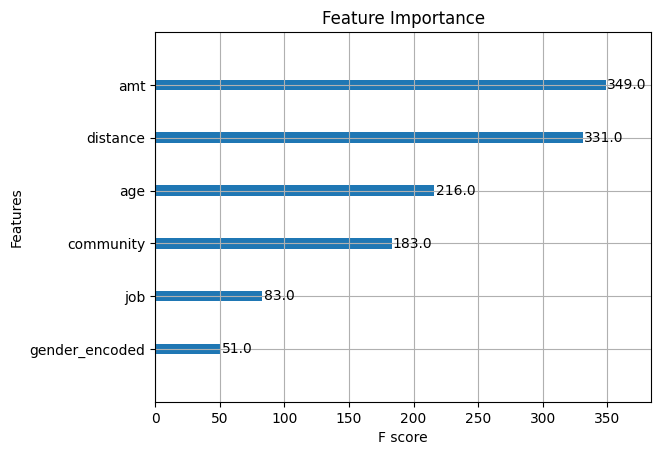

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


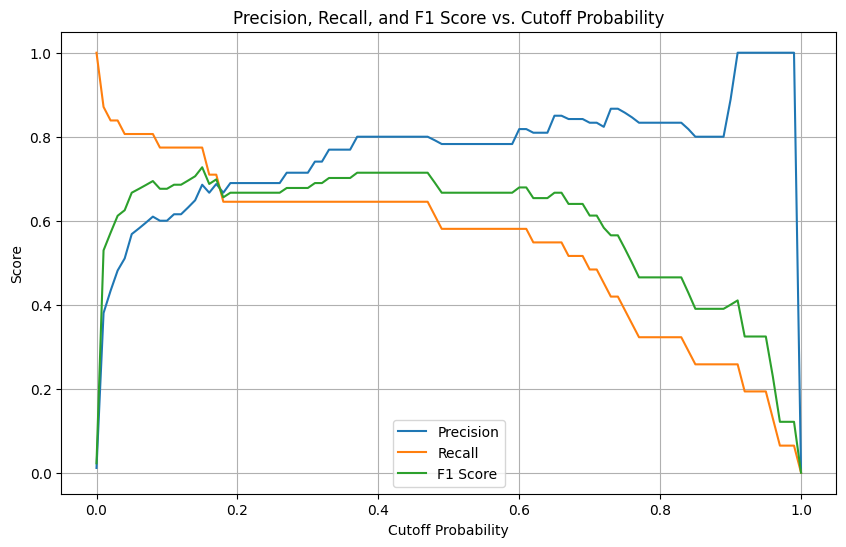

Best cutoff for F1 Score: 0.15
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2695
         1.0       0.69      0.77      0.73        31

    accuracy                           0.99      2726
   macro avg       0.84      0.89      0.86      2726
weighted avg       0.99      0.99      0.99      2726



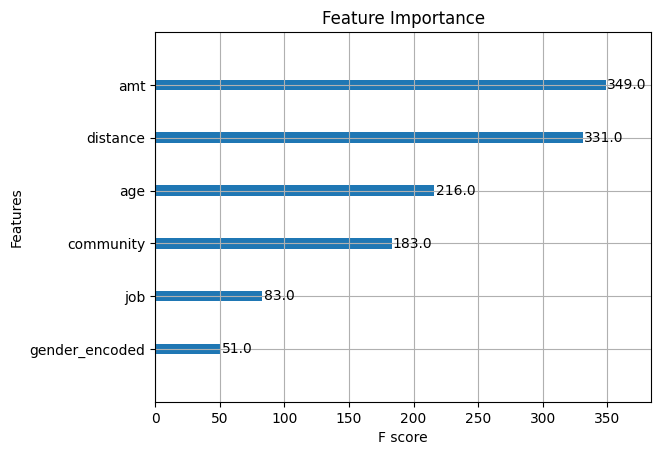

In [71]:
from sklearn.metrics import precision_recall_fscore_support, precision_score, recall_score, f1_score

y_val_pred_proba = model.predict_proba(X_val)[:, 1]
cutoffs = np.linspace(0, 1, 101)
precision = []
recall = []
f1 = []

for cutoff in cutoffs:
    y_val_pred = (y_val_pred_proba >= cutoff).astype(int)
    precision.append(precision_score(y_val, y_val_pred))
    recall.append(recall_score(y_val, y_val_pred))
    f1.append(f1_score(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(cutoffs, precision, label='Precision')
plt.plot(cutoffs, recall, label='Recall')
plt.plot(cutoffs, f1, label='F1 Score')
plt.xlabel('Cutoff Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Cutoff Probability')
plt.legend()
plt.grid(True)
plt.show()


best_cutoff = cutoffs[np.argmax(f1)]
print(f"Best cutoff for F1 Score: {best_cutoff}")

y_val_pred = (y_val_pred_proba >= best_cutoff).astype(int)
print(classification_report(y_val,y_val_pred))


xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

In [77]:

df_majority = train_df[train_df.is_fraud==0]
df_minority = train_df[train_df.is_fraud==1]

# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=int(0.05*len(train_df)),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
train_df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
train_df_upsampled.is_fraud.value_counts()



,count
is_fraud,
0.0,13498
1.0,681


classification report 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2713
         1.0       0.94      1.00      0.97       123

    accuracy                           1.00      2836
   macro avg       0.97      1.00      0.98      2836
weighted avg       1.00      1.00      1.00      2836

confusion_matrix 
 [[2705    8]
 [   0  123]]


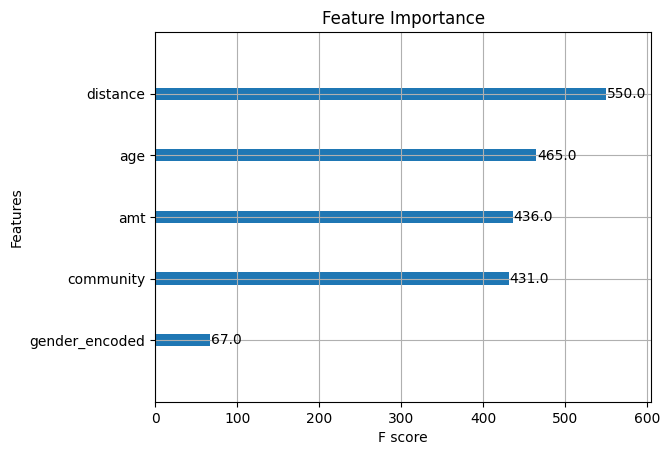

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


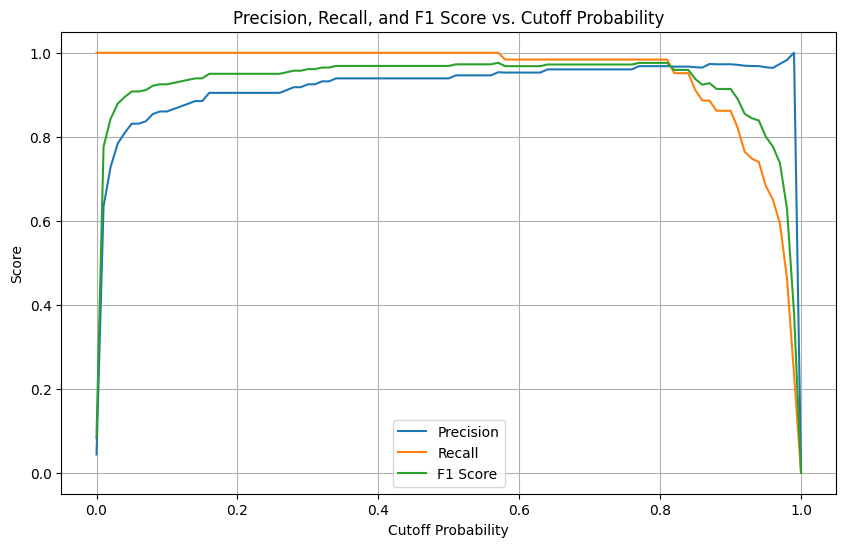

Best cutoff for F1 Score: 0.5700000000000001
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2713
         1.0       0.95      1.00      0.98       123

    accuracy                           1.00      2836
   macro avg       0.98      1.00      0.99      2836
weighted avg       1.00      1.00      1.00      2836



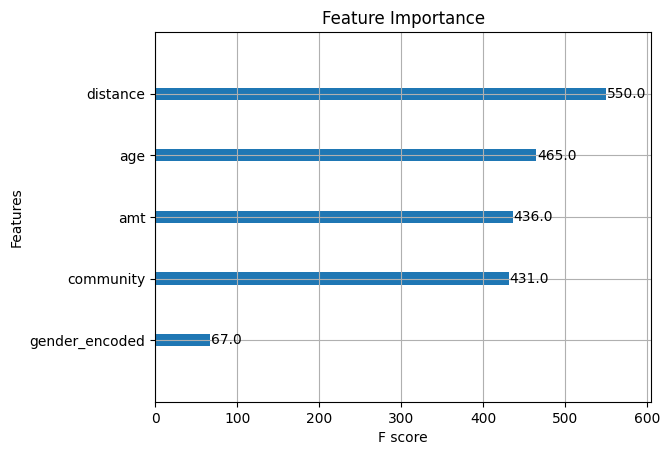

In [78]:

le = LabelEncoder()
train_df_upsampled['gender_encoded'] = le.fit_transform(train_df_upsampled['gender'])

X =  train_df_upsampled[['amt', 'distance', 'age', 'gender_encoded','community']]
y = train_df_upsampled['is_fraud']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(random_state=42, enable_categorical=True)
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

y_val_pred_proba = model.predict_proba(X_val)[:, 1]
cutoffs = np.linspace(0, 1, 101)
precision = []
recall = []
f1 = []

for cutoff in cutoffs:
    y_val_pred = (y_val_pred_proba >= cutoff).astype(int)
    precision.append(precision_score(y_val, y_val_pred))
    recall.append(recall_score(y_val, y_val_pred))
    f1.append(f1_score(y_val, y_val_pred))

plt.figure(figsize=(10, 6))
plt.plot(cutoffs, precision, label='Precision')
plt.plot(cutoffs, recall, label='Recall')
plt.plot(cutoffs, f1, label='F1 Score')
plt.xlabel('Cutoff Probability')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Cutoff Probability')
plt.legend()
plt.grid(True)
plt.show()

best_cutoff = cutoffs[np.argmax(f1)]
print(f"Best cutoff for F1 Score: {best_cutoff}")

y_val_pred = (y_val_pred_proba >= best_cutoff).astype(int)
print(classification_report(y_val,y_val_pred))

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

[0]	validation_0-auc:0.97931
[1]	validation_0-auc:0.98328
[2]	validation_0-auc:0.98590
[3]	validation_0-auc:0.98796
[4]	validation_0-auc:0.98917
[5]	validation_0-auc:0.99234
[6]	validation_0-auc:0.99254
[7]	validation_0-auc:0.99326
[8]	validation_0-auc:0.99423
[9]	validation_0-auc:0.99457
[10]	validation_0-auc:0.99498
[11]	validation_0-auc:0.99538
[12]	validation_0-auc:0.99665
[13]	validation_0-auc:0.99679
[14]	validation_0-auc:0.99689
[15]	validation_0-auc:0.99758
[16]	validation_0-auc:0.99777
[17]	validation_0-auc:0.99805
[18]	validation_0-auc:0.99826
[19]	validation_0-auc:0.99846
[20]	validation_0-auc:0.99856
[21]	validation_0-auc:0.99865
[22]	validation_0-auc:0.99876
[23]	validation_0-auc:0.99879
[24]	validation_0-auc:0.99890
[25]	validation_0-auc:0.99898
[26]	validation_0-auc:0.99900
[27]	validation_0-auc:0.99901
[28]	validation_0-auc:0.99902
[29]	validation_0-auc:0.99904
[30]	validation_0-auc:0.99901
[31]	validation_0-auc:0.99899
[32]	validation_0-auc:0.99896
[33]	validation_0-au

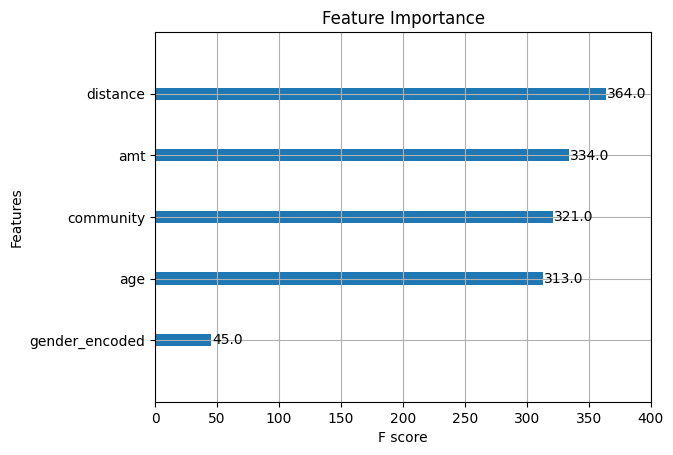

In [79]:
scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1])

model = xgb.XGBClassifier(early_stopping_rounds =5 ,eval_metric='auc', random_state=42,enable_categorical=True,scale_pos_weight=scale_pos_weight)
model.fit(X_train, y_train,eval_set=[(X_val, y_val)])

y_val_pred = model.predict(X_val)


print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()


##### Use stacking

In [85]:
!pip install scikit-learn==1.2.2
!pip install xgboost==1.7.5
!pip install lightgbm==3.3.5
import lightgbm as lgbm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression



base_learners = [
    ('lgbm',lgbm.LGBMClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, enable_categorical=True))
]

meta_learner = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 19.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.5 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.3
    Uninstalling xgboost-2.1.3:
      Successfully uninstalled xgboost-2.1.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


[LightGBM] [Info] Number of positive: 558, number of negative: 10785
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 11343, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049193 -> initscore=-2.961553
[LightGBM] [Info] Start training from score -2.961553


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise a

[LightGBM] [Info] Number of positive: 446, number of negative: 8628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 9074, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049151 -> initscore=-2.962449
[LightGBM] [Info] Start training from score -2.962449
[LightGBM] [Info] Number of positive: 446, number of negative: 8628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 9074, number of used features: 5
[LightGBM] [Info] [binary:Boos

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise 

[LightGBM] [Info] Number of positive: 446, number of negative: 8628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 9074, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049151 -> initscore=-2.962449
[LightGBM] [Info] Start training from score -2.962449
[LightGBM] [Info] Number of positive: 447, number of negative: 8628
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 9075, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.049256 -> initscore=-2.960209
[LightGBM] [In

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise a

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [84]:
base_learners = [
    #('lgbm',lgbm.LGBMClassifier(random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42, enable_categorical=True))
]

meta_learner = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

stacking_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
#model = xgb.XGBClassifier(early_stopping_rounds=10, eval_metric='auc',enable_categorical=True)
#model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=True)

# Make predictions on the validation set
y_val_pred = stacking_model.predict(X_val)

print(f"classification report \n {classification_report(y_val, y_val_pred)}")
print(f"confusion_matrix \n {confusion_matrix(y_val, y_val_pred)}")
